In [21]:
import pandas as pd 
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("car.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.Gender = df.Gender.replace(["Male", "Female"], [0,1])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [6]:
bins = [15000, 35000,150000]
group_names = ["poor", "rich"]
df["EstimatedSalary"] = pd.cut(df["EstimatedSalary"], labels = group_names, bins = bins)
df["EstimatedSalary"].unique()

['poor', 'rich', NaN]
Categories (2, object): ['poor' < 'rich']

In [7]:
df.EstimatedSalary.value_counts()

EstimatedSalary
rich    324
poor     72
Name: count, dtype: int64

In [8]:

lb = LabelEncoder()
df["EstimatedSalary"] = lb.fit_transform(df["EstimatedSalary"])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,0,0
1,15810944,0,35,0,0
2,15668575,1,26,1,0
3,15603246,1,27,1,0
4,15804002,0,19,1,0
...,...,...,...,...,...
395,15691863,1,46,1,1
396,15706071,0,51,0,1
397,15654296,1,50,0,1
398,15755018,0,36,0,0


<Axes: ylabel='count'>

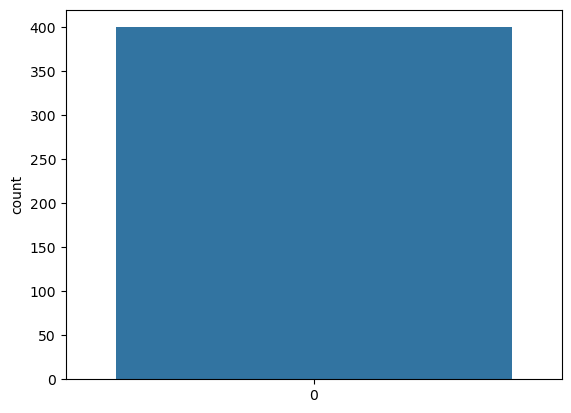

In [9]:
sns.countplot(df["EstimatedSalary"])

In [10]:
x = df.drop("EstimatedSalary", axis =1)
y = df["EstimatedSalary"]
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.3)

In [11]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
x_train

array([[ 1.47844522,  0.94440028, -0.94219506, -0.73956834],
       [-1.51672406,  0.94440028, -0.56287857, -0.73956834],
       [ 0.71645012, -1.05887304, -1.1318533 , -0.73956834],
       ...,
       [ 0.39442731,  0.94440028,  1.23887474,  1.35214009],
       [ 0.10919163, -1.05887304,  0.38541264,  1.35214009],
       [ 1.15424048,  0.94440028, -0.94219506, -0.73956834]])

In [13]:
models = []
models.append(("lr", LogisticRegression()))
models.append(("sv", SVC()))
models.append(("rf", RandomForestClassifier()))
models.append(("kn", KNeighborsClassifier()))
print(models)

[('lr', LogisticRegression()), ('sv', SVC()), ('rf', RandomForestClassifier()), ('kn', KNeighborsClassifier())]


In [14]:
results = dict()
for name, model in models:
    fold = RepeatedStratifiedKFold(n_splits=15, n_repeats=5, random_state=42)
    cv_results = cross_val_score(model, x_train,y_train, cv=fold, scoring="accuracy")
    results[name]=(cv_results.mean(), cv_results.std())
    
print()
print("mame  results.mean  results.std")
for key, value in results.items():
    print(key, value)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=15.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=15.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=15.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=15.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=15.
  warnings.warn(
C:\ProgramData\anaconda3\


mame  results.mean  results.std
lr (0.8146198830409358, 0.02372568745625823)
sv (0.8146198830409358, 0.02372568745625823)
rf (0.7580116959064328, 0.06263926836091638)
kn (0.7948148148148148, 0.06444146084611081)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=15.
  warnings.warn(


In [26]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(accuracy_score(pred, y_test))

0.8


In [29]:
model.fit(x_train, y_train)
predi = model.predict(x_test)
print(classification_report(predi, y_test))

              precision    recall  f1-score   support

           0       0.08      0.29      0.13         7
           1       0.95      0.81      0.87       113

    accuracy                           0.78       120
   macro avg       0.52      0.55      0.50       120
weighted avg       0.90      0.78      0.83       120



In [ ]:
!pip install xgboost
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier
ad = AdaBoostClassifier(n_estimators=45, learning_rate=1)
ad.fit(x_train, y_train)
prd= ad.predict(x_test)
prd

In [19]:
print(classification_report(prd, y_test))

              precision    recall  f1-score   support

           0       0.54      0.16      0.25        80
           1       0.29      0.72      0.41        39
           2       0.00      0.00      0.00         1

    accuracy                           0.34       120
   macro avg       0.28      0.29      0.22       120
weighted avg       0.46      0.34      0.30       120



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
print(confusion_matrix(prd, y_test))

[[13 67  0]
 [11 28  0]
 [ 0  1  0]]


In [22]:
print(accuracy_score(prd, y_test))

0.3416666666666667


In [33]:
gd=GradientBoostingClassifier(n_estimators=100)
gd.fit(x_train, y_train)
g=gd.predict(x_test)
g

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [34]:
print(accuracy_score(g, y_test))

0.7833333333333333


In [36]:
print(confusion_matrix(g, y_test))

[[ 4  6]
 [20 90]]


In [ ]:
!pip install xgboost